# Simulation Log EDA

## Depdendencies

In [2]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt

## Functions


## Globals

In [3]:
#PATH = Path('../logs/simulation_2023_4_4_21_43_57_READABLE.txt')
#PATH2 = Path('../logs/simulation_2023_4_4_21_43_57.txt')
PATH = Path('simulation_2023_4_11_17_4_17_READABLE.txt')
#PATH2 = Path('../logs/simulation_2023_4_8_13_50_21.txt')

-- Timestamp: 310.24

"location": [-214.9896,-217.667]
"temperature": 84.59534
"oxygen_saturation": 0.96, "heart_rate": 200

## Parse the file

In [4]:
# Create empty lists to store each entry
animal_ids = []
species = []
timestamps = []
locations = []
temperatures = []
oxygen_saturations = []
heart_rates = []
air_qualities = []

# Read in the file
with open(PATH, "r") as file:
    for i, line in enumerate(file):
        #print(f"Parsing line {i}...")
        # Get animal ID
        if line.startswith("==============="):
            animal = line.split(' ')[1]
            animal = animal.split(':')
            #species.append(animal[0])
            #animal_ids.append(animal[1])
        else:
            # Check if line starts with "Timestamp"
            if line.startswith("-- Timestamp"):
                # Extract the timestamp value
                timestamp = float(line.split(":")[1].strip())
                timestamps.append(timestamp)
                species.append(animal[0])
                animal_ids.append(animal[1])
            # Check if line starts with "location"
            elif line.startswith('"location"'):
                # Extract the location values
                location = line.split(":")[1].strip().replace("[", "").replace("]", "").split(",")
                location = [float(l.strip()) for l in location]
                locations.append(location)
            # Check if line starts with "temperature"
            elif line.startswith('"temperature"'):
                # Extract the temperature value
                temperature = float(line.split(":")[1].strip())
                temperatures.append(temperature)
            # Check if line starts with "oxygen_saturation"
            elif line.startswith('"oxygen_saturation"'):
                # Extract the oxygen saturation value
                oxygen_saturation = float(line.split(":")[1].strip().split(",")[0])
                oxygen_saturations.append(oxygen_saturation)
                # Extract the heart rate value
                heart_rate = float(line.split(":")[2].strip())
                heart_rates.append(heart_rate)
            elif line.startswith('"air_quality"'):
                air_quality = float(line.split(":")[1].strip().split(",")[0])
                air_qualities.append(air_quality)

# Create a dictionary with the lists
data_dict = {"Animal_ID": animal_ids, #animal_ids[:len(timestamps)],
             "Species": species, #species[:len(timestamps)],
             "Timestamp": timestamps,
             "Location": locations,
             "Temperature": temperatures,
             "Oxygen Saturation": oxygen_saturations,
             "Heart Rate": heart_rates,
             "Air Quality": air_qualities}

# Convert the dictionary to a Pandas dataframe
df = pd.DataFrame(data_dict)


In [5]:
df['Location_X'] = df.Location.apply(lambda x: x[0])
df['Location_Y'] = df.Location.apply(lambda x: x[1])

In [6]:
df.head()

,Animal_ID,Species,Timestamp,Location,Temperature,Oxygen Saturation,Heart Rate,Air Quality,Location_X,Location_Y
0,ed8841,Lion,3456.21,"[152.397, 42.43083]",80.28680,0.98,90.0,29.02868,152.3970,42.43083
1,ed8841,Lion,3457.21,"[151.4735, 42.0274]",80.28663,0.98,90.0,29.02866,151.4735,42.02740
2,ed8841,Lion,3458.21,"[150.5565, 41.62679]",80.28646,0.98,90.0,29.02865,150.5565,41.62679
3,ed8841,Lion,3459.22,"[149.6312, 41.22256]",80.28629,0.98,90.0,29.02863,149.6312,41.22256
4,ed8841,Lion,3460.24,"[148.6991, 40.81535]",80.28611,0.98,90.0,29.02861,148.6991,40.81535


In [7]:
df.Animal_ID.unique()

array(['ed8841', 'e29455', 'e42933', 'd87ab5', '9a9f36', 'b8565b',
       '64d78a', '2ada3a', '7704eb', '627d7b', '881882', '094a59',
       '4d4482', '08a6ce', '46c084', 'c75423', 'a9004d', 'df177f',
       'a69908', '6ffb08', 'a2ff44', 'd2f304', 'ec4fe1'], dtype=object)

In [8]:
df.Species.unique()

array(['Lion', 'Elephant', 'Zebra'], dtype=object)

## Questions to answer

1. Is the Zebra population healthy? Make a thoughtful case one way or another.
1. Do the Zebras have enough room to move around in?
1. Do you see any signs of poachers? If so, where are they?
1. Plot a CDF of the movement speed of Zebras. What do you observe?
1. Do Zebras make friends? Do you see pairs that tend to stay together? 
1. What locations do Zebras tend to congregate at? Why do they tend to go there?
1. Are there any locations Zebras tend to avoid? 


In [9]:
import seaborn as sns
import statsmodels.api as sm

In [10]:
df.describe()

,Timestamp,Temperature,Oxygen Saturation,Heart Rate,Air Quality,Location_X,Location_Y
count,224458.000000,224458.000000,224458.000000,224458.000000,224458.000000,224458.000000,224458.000000
mean,8628.158680,80.305579,0.974387,95.734904,29.030558,-175.313042,-133.545935
std,2864.268361,0.337206,0.009002,57.880029,0.033721,146.945131,184.970759
min,3456.210000,80.000000,0.960000,30.000000,29.000000,-491.943100,-457.030900
25%,6150.190000,80.040560,0.960000,45.000000,29.004060,-240.328100,-254.942700
50%,8629.100000,80.161620,0.980000,60.000000,29.016160,-223.192800,-166.896200
75%,11108.630000,80.495740,0.980000,160.000000,29.049570,-169.625425,-79.971730
max,13586.580000,81.207500,0.990000,200.000000,29.120750,459.361500,481.796500


### Q1: Is the Zebra population healthy? Make a thoughtful case one way or another.

In [11]:
df_zebras = df[df.Species == 'Zebra']

In [12]:
df_zebras.describe()[['Temperature', 'Oxygen Saturation', 'Heart Rate', 'Air Quality']]

,Temperature,Oxygen Saturation,Heart Rate,Air Quality
count,88256.000000,88256.000000,88256.000000,88256.000000
mean,80.305243,0.971640,118.558738,29.030524
std,0.336431,0.009876,69.076631,0.033643
min,80.000000,0.960000,40.000000,29.000000
25%,80.040960,0.960000,60.000000,29.004100
50%,80.163210,0.980000,60.000000,29.016320
75%,80.493000,0.980000,200.000000,29.049300
max,81.207500,0.990000,200.000000,29.120750


In [13]:
df_zebras.groupby('Animal_ID').describe()['Heart Rate']

,count,mean,std,min,25%,50%,75%,max
Animal_ID,,,,,,,,
08a6ce,9750.0,184.344615,44.182737,40.0,200.0,200.0,200.0,200.0
2ada3a,9862.0,61.299939,13.548617,40.0,60.0,60.0,60.0,200.0
627d7b,9824.0,60.000000,0.000000,60.0,60.0,60.0,60.0,60.0
6ffb08,9548.0,200.000000,0.000000,200.0,200.0,200.0,200.0,200.0
7704eb,9845.0,59.987811,0.493614,40.0,60.0,60.0,60.0,60.0
9a9f36,9918.0,198.217383,15.718108,40.0,200.0,200.0,200.0,200.0
a9004d,9677.0,182.757053,46.031472,40.0,200.0,200.0,200.0,200.0
b8565b,9904.0,64.808158,25.667373,40.0,60.0,60.0,60.0,200.0
d87ab5,9928.0,60.000000,0.000000,60.0,60.0,60.0,60.0,60.0


### Q2: Do the Zebras have enough room to move around in? & Q3: Do you see any signs of poachers? If so, where are they? & Q6: What locations do Zebras tend to congregate at? Why do they tend to go there?

Text(0.5, 0.5, 'Y')

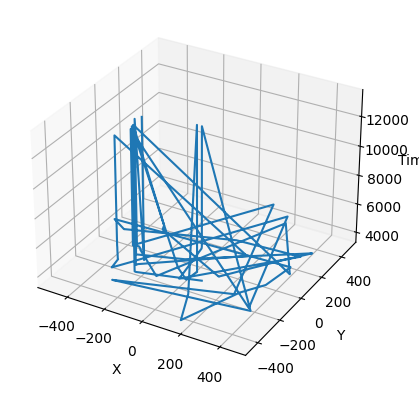

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_zebras['Location_X'], df_zebras['Location_Y'], df_zebras['Timestamp'], )
ax.set_zlabel('Time')
ax.set_xlabel('X')
ax.set_ylabel('Y')

### Q4: Plot a CDF of the movement speed of Zebras. 

In [15]:
def distance(X):
    if isinstance(X, pd.Series):
        X = np.array(list(X))
    return np.sqrt(np.sum(np.power(np.diff(X, axis=0), 2), axis=1))

In [16]:
def velocity(X, t):
    X = distance(X)
    t = np.diff(t)
    return X/t

In [17]:
df_zebras['velocity'] = np.array([0, *velocity(df_zebras.Location, df_zebras.Timestamp)])

/var/folders/5c/6yvtft556jj8gxtqmv8xjp_w0000gn/T/ipykernel_23902/1952652932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zebras['velocity'] = np.array([0, *velocity(df_zebras.Location, df_zebras.Timestamp)])


<Axes: xlabel='Timestamp', ylabel='velocity'>

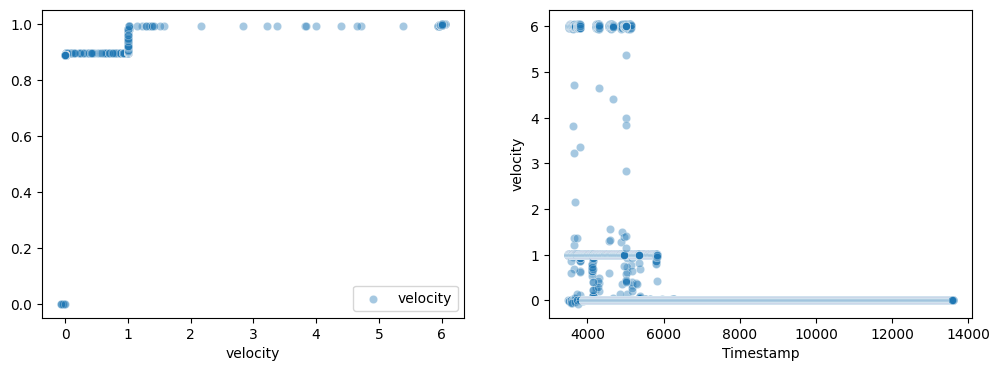

In [18]:
col = 'velocity'
ecdf = sm.distributions.ECDF(df_zebras[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=df_zebras[col], y=ecdf(df_zebras[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df_zebras['Timestamp'], y=df_zebras[col], alpha=0.4, ax=axes[1])

### Q5: Do Zebras make friends? Do you see pairs that tend to stay together? 

In [19]:
from itertools import combinations

In [28]:
df_zebras_small = df_zebras[df_zebras['Timestamp'] < 5000]

In [29]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def calculate_avg_distance_between_animals(df):
    unique_animals = df['Animal_ID'].unique()
    animal_pairs = list(combinations(unique_animals, 2))
    distances = []

    for pair in animal_pairs:
        animal1_data = df[df['Animal_ID'] == pair[0]][['Location_X', 'Location_Y']].values
        animal2_data = df[df['Animal_ID'] == pair[1]][['Location_X', 'Location_Y']].values
        pair_distances = []

        for loc1 in animal1_data:
            for loc2 in animal2_data:
                pair_distances.append(euclidean_distance(loc1, loc2))

        avg_pair_distance = np.mean(pair_distances) if len(pair_distances) > 0 else 0
        distances.append(avg_pair_distance)
        print(f"Average distance between {pair[0]} and {pair[1]}: {avg_pair_distance}")

    overall_avg_distance = np.mean(distances) if len(distances) > 0 else 0
    return overall_avg_distance

avg_distance = calculate_avg_distance_between_animals(df_zebras_small)
print(f"Overall average distance between animals: {avg_distance}")

Average distance between d87ab5 and 9a9f36: 251.7772343448541
Average distance between d87ab5 and b8565b: 447.9001422018421
Average distance between d87ab5 and 2ada3a: 423.296957520088
Average distance between d87ab5 and 7704eb: 540.4360071779382
Average distance between d87ab5 and 627d7b: 125.30798525426685
Average distance between d87ab5 and 08a6ce: 465.8119861343969
Average distance between d87ab5 and a9004d: 499.8366013360991
Average distance between d87ab5 and 6ffb08: 111.34944658726359
Average distance between 9a9f36 and b8565b: 313.1355993258413
Average distance between 9a9f36 and 2ada3a: 307.23253976077154
Average distance between 9a9f36 and 7704eb: 337.2092367720068
Average distance between 9a9f36 and 627d7b: 232.64397596014408
Average distance between 9a9f36 and 08a6ce: 279.00364334074317
Average distance between 9a9f36 and a9004d: 309.1946050875046
Average distance between 9a9f36 and 6ffb08: 252.44133399457723
Average distance between b8565b and 2ada3a: 422.1747434199476
Ave

#### Q6: What locations do Zebras tend to congregate at? Why do they tend to go there?

*done up to here.

<Axes: xlabel='Location_X', ylabel='Location_Y'>

/Users/yutaro/.pyenv/versions/3.10.1/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


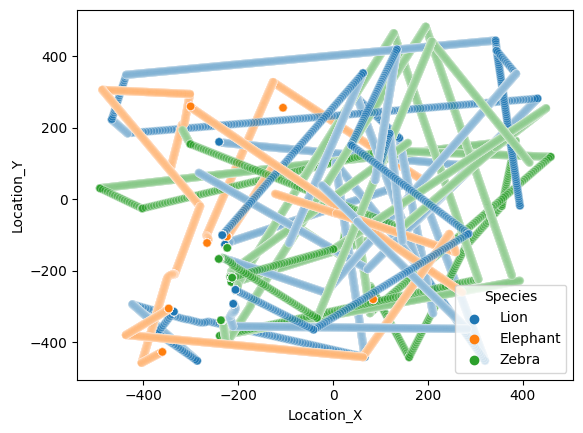

In [91]:
sns.scatterplot(x='Location_X', y='Location_Y', data=df, hue='Species', alpha=0.4)

A nicer way to look at it with a kernel density function. Somewhat reminiscent of the heatmaps in soccer and other team games. 

In [92]:

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Apply the kernel density estimate to the location data and create a heatmap
sns.kdeplot(
    x=df['Location_X'],
    y=df['Location_Y'],
    cmap='Reds',
    fill=True, 
    bw_method =0.15, 
    ax=ax,
    )

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Iso Map of Location Data')

plt.show()

In [ ]:
col = 'Oxygen Saturation'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df[col], alpha=0.4, ax=axes[1])

In [ ]:
df['Oxygen Saturation'].unique()

Only three oxygen values?

In [ ]:
sns.scatterplot(x=df['Oxygen Saturation'], y=df['Heart Rate'], alpha=0.4)

Why is oxygen saturation declining with heart rate? Does it mean running fast makes your heart beat faster, but the oxygen is consumed at a yet higher rate?

Oxygen debt?

In [ ]:
col = 'Oxygen Saturation'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df[col], alpha=0.4, ax=axes[1])

How does velocity change over time?

I find both plots hard to interpret.

The text suggests to create such a plot for each species. This sort of plot is also known as a kymograph.

In [ ]:
# Calculate the ECDF of the "Temperature" column
col = 'Temperature'
ecdf = sm.distributions.ECDF(df[col])

# Plot the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].plot(ecdf.x, ecdf.y)
sns.scatterplot(x=df[col], y=ecdf(df[col]), alpha=0.4, ax=axes[0], label=col)
sns.scatterplot(x=df['Timestamp'], y=df['Temperature'], alpha=0.4, ax=axes[1])